In [1]:
pwd

'C:\\Users\\csk\\Github\\DACON_AI_competition_for_predicting_Lymph_node_metastasis_of_breast_cancer\\code'

# import

In [2]:
import os
import random
from datetime import datetime

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("display.max.colwidth", 150)
pd.set_option("display.max.row", 500)

import warnings

warnings.filterwarnings("ignore")
from tqdm.auto import tqdm

# train 이미지 전처리

## train_imgs 확인

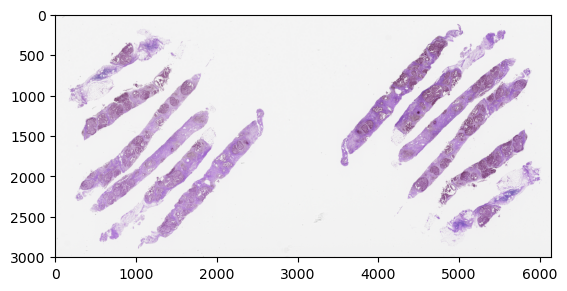

In [3]:
trian_mask_test_img = "./dataset/img_data/train_imgs/BC_01_0001.png"
img = cv2.imread(trian_mask_test_img, cv2.IMREAD_UNCHANGED)
plt.imshow(img)
plt.show()

## Image Crop

### 이미지 자르는 사용자 함수

In [4]:
def Img_Crop(input_dir, input_img_name_list, crop_size, min_img_density, flag):
    print(f"The number of images : {len(os.listdir(input_dir))}")
    print("img_crop 중...")
    output_dir = input_dir + "_cropped"
    # cropped 폴더 생성
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    else:
        pass

    for img_name in tqdm(input_img_name_list):
        img = os.path.join(input_dir, img_name)
        cv2_img = cv2.imread(img, flag)
        for row, start_y_pixel in enumerate(range(0, cv2_img.shape[0], crop_size)):
            for col, start_x_pixel in enumerate(range(0, cv2_img.shape[1], crop_size)):
                # 이미지 자르기
                croped_img = cv2_img[
                    start_y_pixel : start_y_pixel + crop_size,
                    start_x_pixel : start_x_pixel + crop_size,
                ]
                # 이미지 패딩
                if croped_img.shape[0] != croped_img.shape[1]:
                    height, width = croped_img.shape[:2]
                    top = bottom = left = right = 0
                    if (height != crop_size) | (width != crop_size):
                        bottom = crop_size - height
                        right = crop_size - width

                    borderType = cv2.BORDER_CONSTANT
                    value = [244, 244, 244]  # 패딩을 채울 색상
                    croped_img = cv2.copyMakeBorder(
                        croped_img, top, bottom, left, right, borderType, None, value
                    )
                # 밀도 계산
                img = cv2.cvtColor(croped_img, cv2.COLOR_BGR2GRAY)
                if len(img[img < 240]) / (crop_size**2) >= min_img_density:
                    # 이미지 저장
                    cv2.imwrite(
                        f'{output_dir}/{img_name.split(".")[0]}_({row+1:03d},{col+1:03d}).png',
                        croped_img,
                    )

    sample_img = random.choice(os.listdir(output_dir))
    img = os.path.join(output_dir, sample_img)
    cv2_img = cv2.imread(img)
    print(f"Sample Image : {sample_img}")
    plt.imshow(cv2_img)
    plt.show()

    print(f"The number of cropped images : {len(os.listdir(output_dir))}")
    print("완료")

### train images cutting

The number of images : 1000
img_crop 중...


  0%|          | 0/1000 [00:00<?, ?it/s]

Sample Image : BC_01_0342_(015,023).png


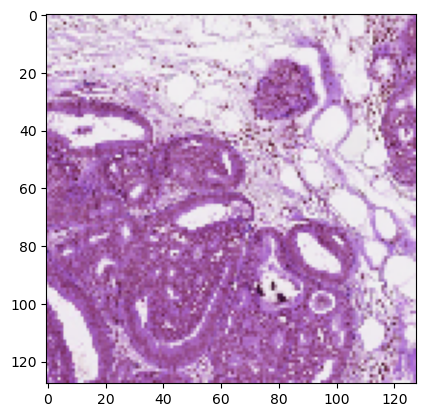

The number of cropped images : 106748
완료


In [5]:
# 크롭하려는 img 폴더
input_dir = "./dataset/img_data/train_imgs"

# 크롭하려는 img name list
input_img_name_list = sorted(os.listdir(input_dir))
# print(input_img_name_list)

# 크롭할 사이즈
crop_size = 128

# min_img_density
min_img_density = 0.75

# 이미지 불러오는 형식
flag = cv2.IMREAD_UNCHANGED

# image cropping
Img_Crop(input_dir, input_img_name_list, crop_size, min_img_density, flag)

### test images cutting

The number of images : 250
img_crop 중...


  0%|          | 0/250 [00:00<?, ?it/s]

Sample Image : BC_01_3024_(012,029).png


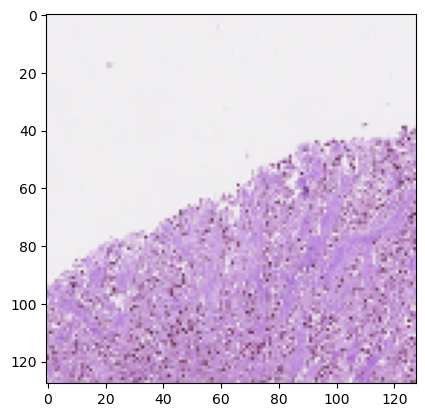

The number of cropped images : 27140
완료


In [6]:
# 크롭하려는 img 폴더
input_dir = "./dataset/img_data/test_imgs"

# 크롭하려는 img name list
input_img_name_list = sorted(os.listdir(input_dir))
# print(input_img_name_list)

# 크롭할 사이즈
crop_size = 128

# min_img_density
min_img_density = 0.75

# 이미지 불러오는 형식
flag = cv2.IMREAD_UNCHANGED

# image cropping
Img_Crop(input_dir, input_img_name_list, crop_size, min_img_density, flag)

## Image Pixel Density
- 픽셀 밀도 : GRAYSCALE 값이 240 이하인 픽셀의 비율
- 픽셀 밀도 50% 미만 이미지 삭제

In [7]:
# 밀도 0.5 이상 이미지만 저장
# 밑에는 할 필요 X

### 이미지 밀도 전처리 사용자 함수

In [8]:
# def Pixel_Density(input_dir, min_img_density, image):
#     # 변수 선언
#     now = datetime.now()
#     # input_dir = './img_data/train_imgs_cropped'
#     input_img_name_list = sorted(os.listdir(input_dir))
#     # min_img_density = 0.50

#     # print(input_img_name_list[:10])
#     print(f"The number of cropped images : {len(input_img_name_list)}")

#     df = pd.DataFrame(columns=[f"{image}_img_name", "img_name", "density"])
#     df["img_name"] = input_img_name_list
#     df.fillna(0)
#     df[f"{image}_img_name"] = df["img_name"].apply(lambda x: x[:10])
#     # display(df)

#     for img_name in tqdm(input_img_name_list):
#         img = os.path.join(input_dir, img_name)
#         cv2_img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
#         df["density"][df["img_name"] == img_name] = len(cv2_img[cv2_img < 240]) / (
#             crop_size**2
#         )

#     df = df[df.density >= min_img_density]

#     # 필셀 밀도 Data Frame 저장
#     current_time = now.strftime("%Y%m%d_%H%M%S")
#     df.to_pickle(f"{input_dir}/{image}_{min_img_density}_{current_time}.pkl")
#     df = pd.read_pickle(f"{input_dir}/{image}_{min_img_density}_{current_time}.pkl")

#     # 이미지 밀도 min_img_density 이하인 이미지는 삭제
#     for i in input_img_name_list:
#         if i in list(df.img_name):
#             pass
#         else:
#             os.remove(os.path.join(input_dir, i))

#     print(
#         f"The number of cropped images, density over {min_img_density*100}% : {len(os.listdir(input_dir))}"
#     )

#     sample_img = random.choice(os.listdir(input_dir))
#     print(f"Sample Image : {sample_img}")
#     #     img = f'./img_data/train_imgs_cropped/{sample_img}'
#     img = os.path.join(input_dir, sample_img)
#     cv2_img = cv2.imread(img)
#     plt.imshow(cv2_img)
#     plt.show()

#     print("완료")
#     df

### 픽셀 밀도 50% 미만  train 이미지 삭제

In [9]:
# image = "train"
# input_dir = "./img_data/train_imgs_cropped"
# min_img_density = 0.70  # 70퍼

# Pixel_Density(input_dir, min_img_density, image)

### 픽셀 밀도 50% 미만  test 이미지 삭제

In [10]:
# image = "test"
# input_dir = "./img_data/test_imgs_cropped"
# min_img_density = 0.50

# Pixel_Density(input_dir, min_img_density, image)